<a href="https://colab.research.google.com/github/tspacel/gh-usernames/blob/master/STA160_Midterm_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 160 Midterm Project


## 1.1 Load the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [ ]:
#load data from google drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
#drive.mount('/content/gdrive')
path = '/gdrive/MyDrive/heart_disease_health_indicators_BRFSS2015.csv'
heart_disease = pd.read_csv(path)

## 1.2 Overview of the data structure and outline

In [ ]:
print (heart_disease.head(10))
print( heart_disease.describe())
print(heart_disease.info())

   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5                   0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6                   0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7                   0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8                   1.0     1.0       1.0        1.0  30.0     1.0     0.0   
9                   0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0         

From the out put above we can see that the dataset contains 253680 rows of data and 21 different columns , each rows are make up by the non-null

### Dimionation reduction to creat the 2x2 dim contingency table

In [ ]:
data_crosstab = pd.crosstab(heart_disease['HighBP'],
                            heart_disease['HeartDiseaseorAttack'], 
                            margins = False)
print(data_crosstab)

HeartDiseaseorAttack     0.0    1.0
HighBP                             
0.0                   138886   5965
1.0                    90901  17928


In [ ]:
data_crosstab = pd.crosstab([heart_disease.HighBP, heart_disease.HighChol], 
                             heart_disease.HeartDiseaseorAttack, margins = False)
print(data_crosstab)

HeartDiseaseorAttack    0.0    1.0
HighBP HighChol                   
0.0    0.0            99044   2876
       1.0            39842   3089
1.0    0.0            39905   4264
       1.0            50996  13664


In [ ]:
data_crosstab = pd.crosstab([heart_disease.HighBP, heart_disease.HighChol,heart_disease.Age], 
                             heart_disease.HeartDiseaseorAttack, margins = False)
print(data_crosstab)

HeartDiseaseorAttack    0.0   1.0
HighBP HighChol Age              
0.0    0.0      1.0    4809    21
                2.0    5981    26
                3.0    8171    56
                4.0    9287    62
                5.0    9732    87
                6.0   10281   120
                7.0   11466   196
                8.0   11120   240
                9.0    9734   353
                10.0   7501   415
                11.0   4588   365
                12.0   2965   339
                13.0   3409   596
       1.0      1.0     377     1
                2.0     706     4
                3.0    1248    12
                4.0    1882    23
                5.0    2551    46
                6.0    3580   103
                7.0    4951   242
                8.0    5872   351
                9.0    6149   490
                10.0   5487   539
                11.0   3518   485
                12.0   1890   354
                13.0   1631   439
1.0    0.0      1.0     364     4
              

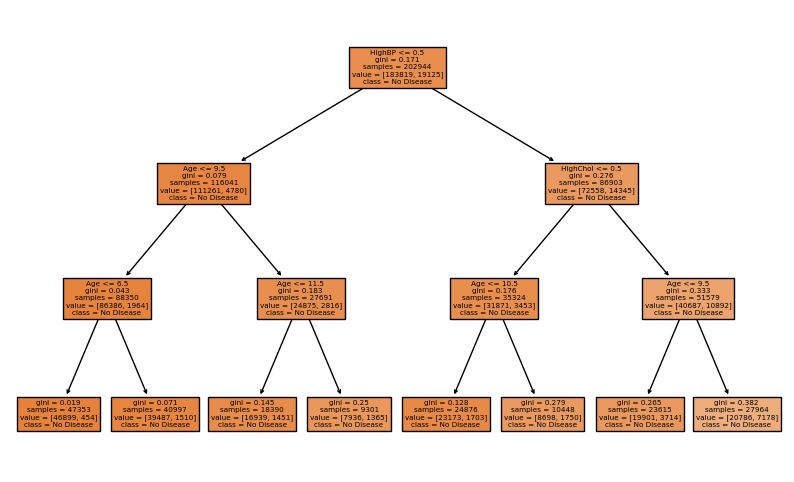

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Define the feature columns and target column
features = ['HighBP', 'HighChol', 'Age']
target = 'HeartDiseaseorAttack'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(heart_disease[features], 
                                                    heart_disease[target], 
                                                    test_size=0.2, 
                                                    random_state=42)

# Initialize the decision tree classifier with a maximum depth of 3
clf = DecisionTreeClassifier(max_depth=3)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=features, class_names=['No Disease', 'Disease'], filled=True)
plt.show()


In this program, we first load the 'heart_disease' dataset using pandas and define the feature columns ('HighBP', 'HighChol', and 'Age') and the target column ('HeartDiseaseorAttack'). We then split the data into training and testing sets using the train_test_split function from scikit-learn.

Next, we initialize a decision tree classifier with a maximum depth of 3 and train it on the training set using the fit method. Finally, we plot the resulting decision tree using the plot_tree function from scikit-learn, which takes as input the trained classifier (clf), the feature names (features), the class names ('No Disease' and 'Disease'), and the filled argument, which fills the tree nodes with colors according to the class distribution. We also set the figsize argument to (10, 6) to make the plot larger.

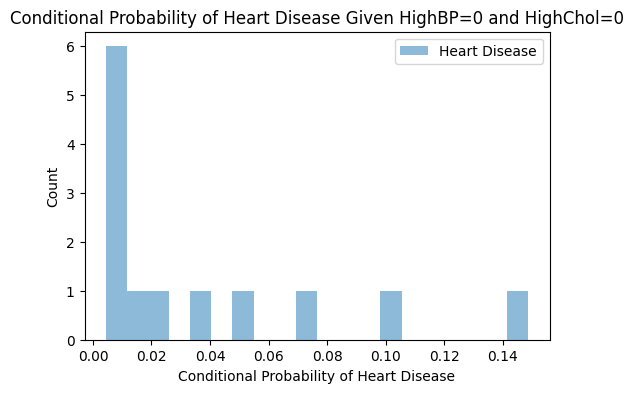

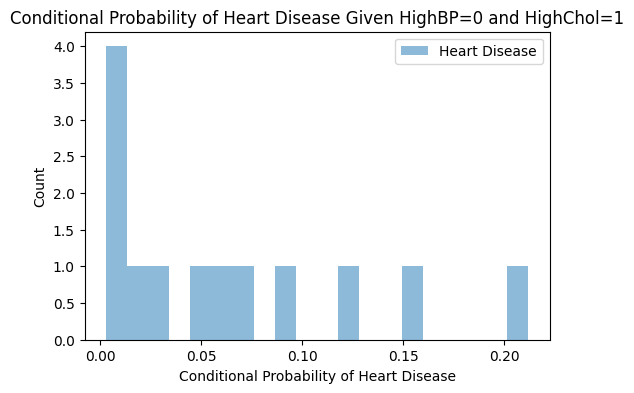

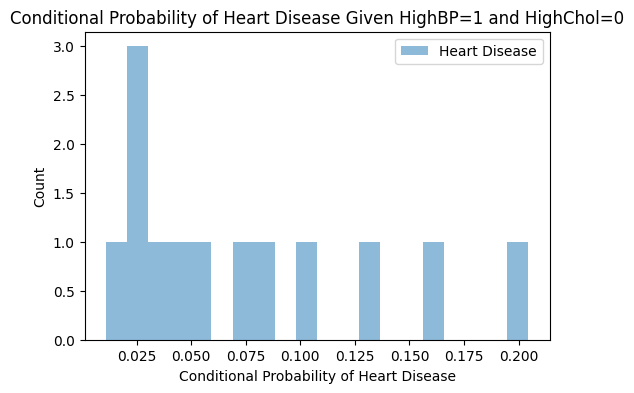

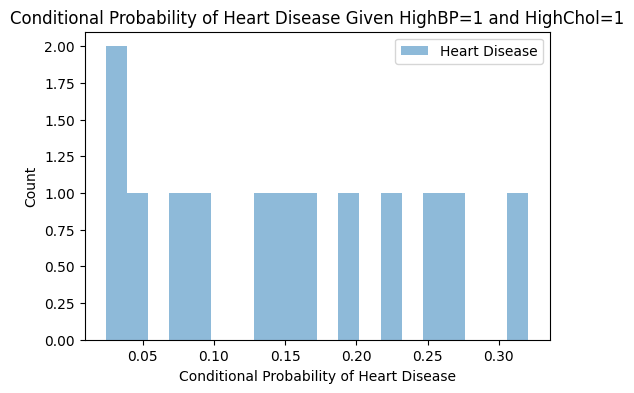

In [ ]:
# Bin the data by age
age_bins = heart_disease['Age']

# Calculate the conditional probability of HeartDiseaseorAttack for each combination of HighBP, HighChol, and Age
heart_disease_cond_prob = heart_disease.groupby(['HighBP', 'HighChol', 'Age'])['HeartDiseaseorAttack'].mean().reset_index()

# Plot the conditional probability as a histogram for each combination of HighBP and HighChol
for high_bp in [0, 1]:
    for high_chol in [0, 1]:
        plt.figure(figsize=(6, 4))
        plt.hist(heart_disease_cond_prob[(heart_disease_cond_prob['HighBP'] == high_bp) & (heart_disease_cond_prob['HighChol'] == high_chol)]['HeartDiseaseorAttack'], bins=20, alpha=0.5, label='Heart Disease')
        plt.xlabel('Conditional Probability of Heart Disease')
        plt.ylabel('Count')
        plt.title('Conditional Probability of Heart Disease Given HighBP={} and HighChol={}'.format(high_bp, high_chol))
        plt.legend()
        plt.show()

In [ ]:
from scipy.stats import entropy

# Calculate the conditional entropy of HeartDiseaseorAttack for each combination of HighBP, HighChol, and Age
heart_disease_cond_entropy = heart_disease.groupby(['HighBP', 'HighChol', 'Age'])['HeartDiseaseorAttack'].apply(lambda x: entropy(np.histogram(x, bins=[0, 0.5, 1])[0], base=2)).reset_index()
heart_disease_cond_entropy = heart_disease_cond_entropy.rename(columns={'HeartDiseaseorAttack': 'Entropy'})
age = heart_disease.Age
# Plot the conditional entropy as a heatmap for each combination of HighBP and HighChol
heatmap_data = heart_disease_cond_entropy.pivot(index=['Age', 'HighBP'], columns='HighChol', values='Entropy')
plt.imshow(heatmap_data, cmap='YlOrRd', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len([0, 1])), [0, 1])
plt.yticks(age)
plt.xlabel('HighChol')
plt.ylabel('Age')
plt.title('Conditional Entropy of Heart Disease Given HighBP and HighChol')
plt.show()
